## 单向波动差择时策略

In [ ]:
# from tick_trade_api import TradeAPI
# # 输入指定账户
# trade_api=TradeAPI('79855043',order_policy=MarketPolicy)


In [13]:
source_code="""

# 单向波动差择时策略
import pandas as pd
#初始化账户       
def init(context):      
    #设置要交易的股票      
    context.security = '000300.SH'   
    # 波动差均值系数
    #context.N = 55 #日线
    context.N = 1200  #分钟线
#设置买卖条件，每个交易频率（日/分钟/tick）调用一次   
def handle_bar(context,bar_dict):
    # 获取开、高、低价格
    #data = history(context.security, ['open','high','low'], context.N+1, '1d')
    data = history(context.security, ['open','high','low'], context.N+1, '1m')
    # 计算上行波动
    dif_up = data['high']/data['open']-1
    # 计算下行波动
    dif_down = 1-data['low']/data['open']
    # 计算波动差值
    dif_T = dif_up-dif_down
    # 计算波动差值均值
    dif_ma = pd.rolling_mean(dif_T,context.N)
    # 持股市值
    value = context.portfolio.stock_account.market_value
    # 若均值为正，则买入或持仓
    if dif_ma.values[-1] > 0 and value==0:
        order_target_percent(context.security,1)
    # 若均值为负，则卖出或空仓
    if dif_ma.values[-1] < 0 and value> 0:
        order_target(context.security,0)
        
"""



In [14]:
# 系统重置
try:
    import shutil
    shutil.rmtree('persist/研究环境策略')
except:
    pass


In [ ]:
# 模拟运行
#rtrade = research_trade('研究环境策略', source_code, capital_base=float(10000000), frequency='MINUTE', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易


2018-02-07 10:55:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 10:56:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 10:57:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 10:58:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 10:59:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:00:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:01:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:02:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:03:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:04:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:05:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:06:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:07:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:08:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:09:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:10:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:11:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:12:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 11:13:00.000000 - WARN - 000300.SH 下单量为0
2018-02-07 1

2018-02-14 11:02:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:09:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:10:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:11:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:12:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:13:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:14:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:15:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:16:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:17:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:18:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:19:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 11:30:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:01:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:02:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:05:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:06:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:07:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 13:08:00.000000 - WARN - 000300.SH 下单量为0
2018-02-14 1

2018-03-19 13:58:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 13:59:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:00:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:01:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:02:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:03:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:04:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:05:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:06:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:07:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:08:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:09:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:10:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:11:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:12:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:13:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:14:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:15:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 14:16:00.000000 - WARN - 000300.SH 下单量为0
2018-03-19 1

2018-03-30 14:53:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:54:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:55:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:56:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:57:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:58:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 14:59:00.000000 - WARN - 000300.SH 下单量为0
2018-03-30 15:00:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:31:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:32:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:33:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:34:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:35:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:36:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:37:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:38:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:39:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:40:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 10:41:00.000000 - WARN - 000300.SH 下单量为0
2018-04-02 1

2018-04-09 11:19:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:20:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:21:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:22:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:23:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:24:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:25:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:26:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:27:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:28:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:29:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 11:30:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:01:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:02:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:03:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:04:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:05:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:06:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 13:07:00.000000 - WARN - 000300.SH 下单量为0
2018-04-09 1

2018-04-12 14:10:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:11:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:12:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:13:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:14:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:15:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:16:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:17:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:18:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:19:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:20:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:21:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:22:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:23:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:24:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:25:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:26:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:27:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 14:28:00.000000 - WARN - 000300.SH 下单量为0
2018-04-12 1

2018-04-26 14:14:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:15:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:16:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:17:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:18:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:19:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:20:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:21:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:22:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:23:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:24:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:25:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:26:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:27:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:28:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:29:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:32:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:33:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 14:34:00.000000 - WARN - 000300.SH 下单量为0
2018-04-26 1

2018-05-03 11:26:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 11:27:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 11:28:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 11:29:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 11:30:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:01:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:02:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:03:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:04:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:05:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:06:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:07:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:08:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:09:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:10:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:11:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:12:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:13:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 13:14:00.000000 - WARN - 000300.SH 下单量为0
2018-05-03 1

2018-05-21 10:44:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:45:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:46:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:47:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:48:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:49:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:50:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:51:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:52:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:53:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:54:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:55:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:56:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:57:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:58:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 10:59:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 11:00:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 11:01:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 11:02:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 1

2018-05-21 14:52:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:53:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:54:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:55:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:56:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:57:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:58:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 14:59:00.000000 - WARN - 000300.SH 下单量为0
2018-05-21 15:00:00.000000 - WARN - 000300.SH 下单量为0


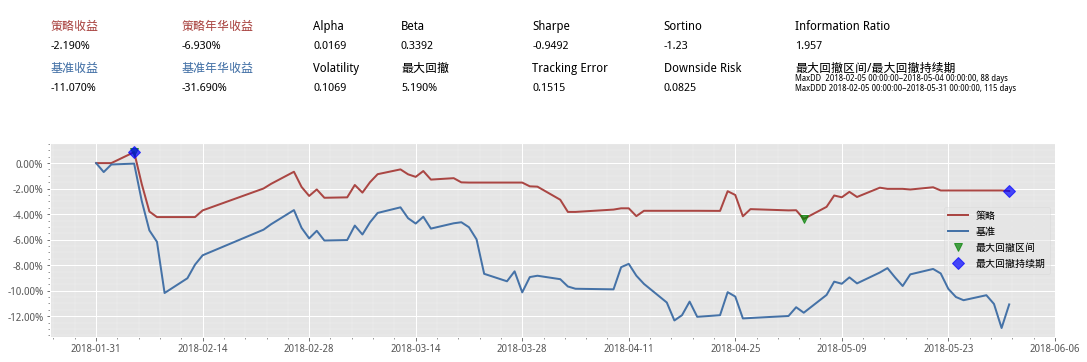

{'analyser': {'benchmark_portfolio':                 close  unit_net_value
  2018-01-31  4275.8986        1.000000
  2018-02-01  4245.8978        0.992984
  2018-02-02  4271.2326        0.998909
  2018-02-05  4274.1464        0.999590
  2018-02-06  4148.8856        0.970296
  2018-02-07  4050.4972        0.947286
  2018-02-08  4012.0472        0.938293
  2018-02-09  3840.6527        0.898209
  2018-02-12  3890.1046        0.909775
  2018-02-13  3935.6324        0.920422
  2018-02-14  3966.9614        0.927749
  2018-02-22  4052.7332        0.947809
  2018-02-23  4071.0889        0.952101
  2018-02-26  4118.4186        0.963170
  2018-02-27  4058.9806        0.949270
  2018-02-28  4023.6415        0.941005
  2018-03-01  4049.0863        0.946956
  2018-03-02  4016.4610        0.939326
  2018-03-05  4018.0970        0.939708
  2018-03-06  4066.5647        0.951043
  2018-03-07  4036.6536        0.944048
  2018-03-08  4077.6001        0.953624
  2018-03-09  4108.8652        0.960936
  201

In [15]:
# 回测运行
# research_strategy(source_code, start_date=None, end_date=None, capital_base=100000, frequency='DAILY', stock_market='STOCK', benchmark=None)
#research_strategy(source_code, start_date='20191230', end_date='20220531', capital_base=float(4551000), frequency='MINUTE', stock_market='STOCK', benchmark=None)
research_strategy(source_code, start_date='20180201', end_date='20180531', capital_base=float(1000000), frequency='MINUTE', stock_market='STOCK', benchmark=None)
